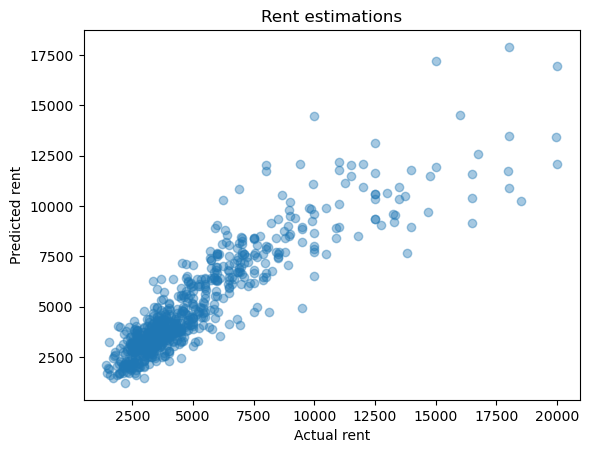

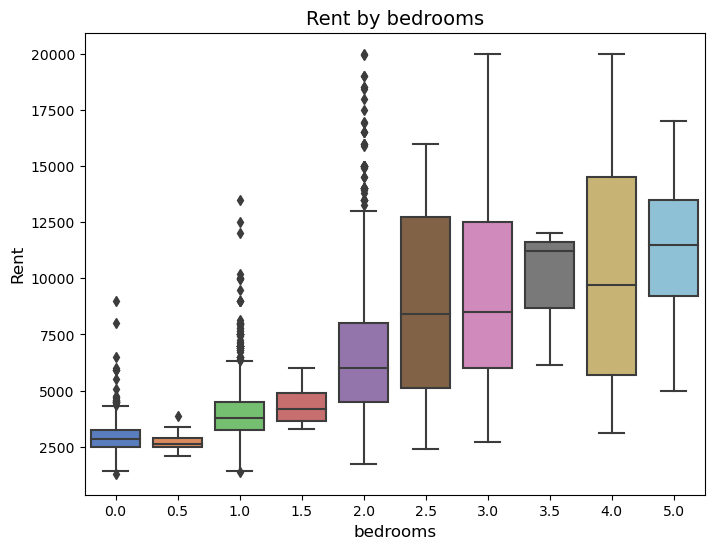

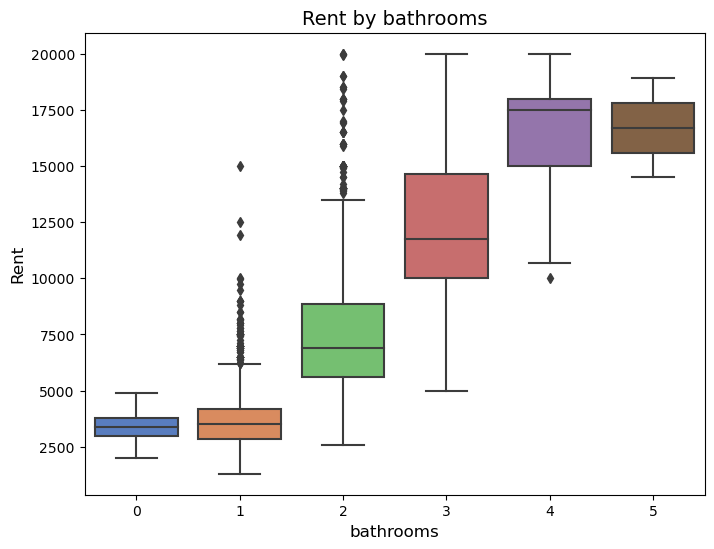

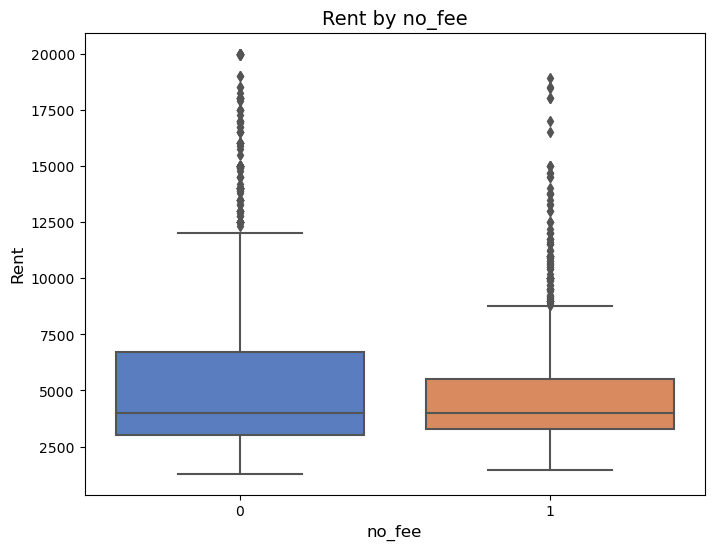

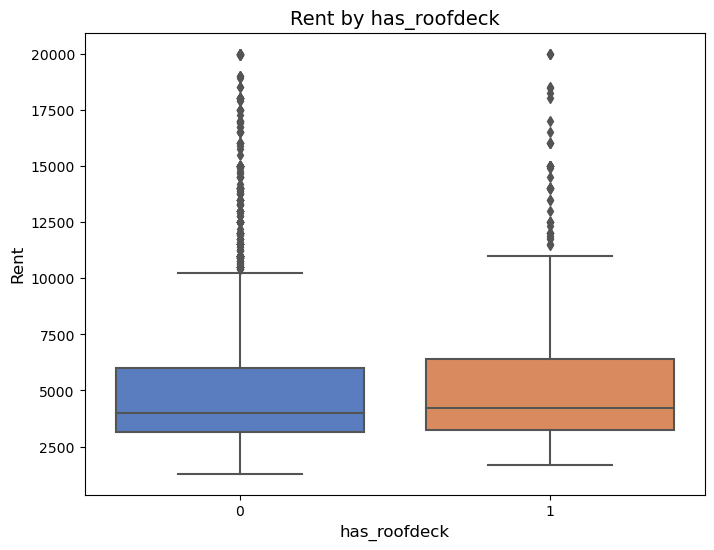

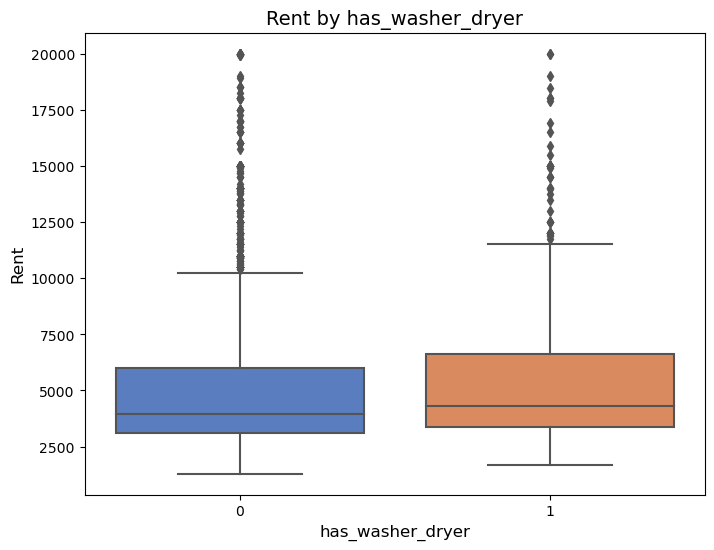

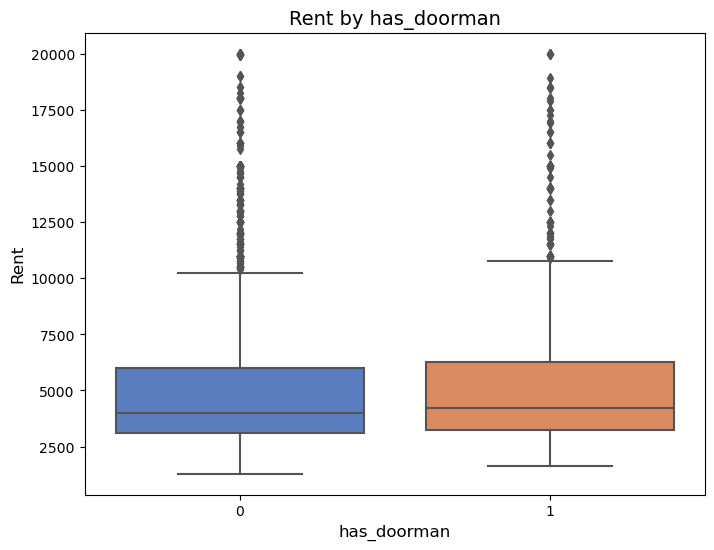

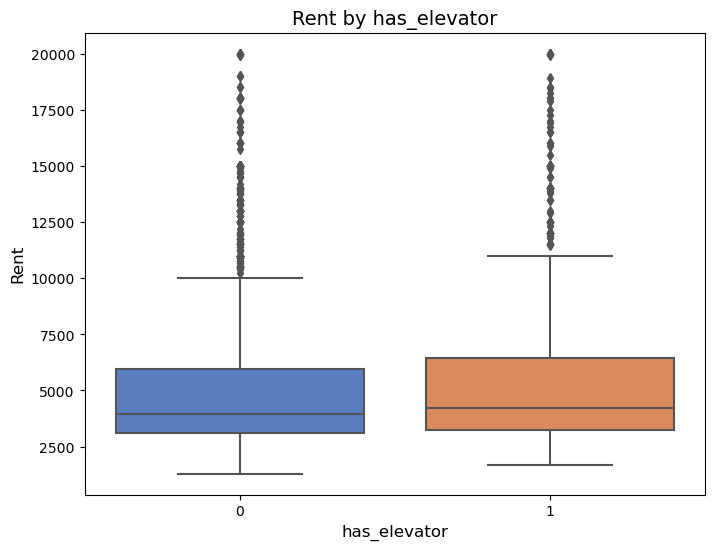

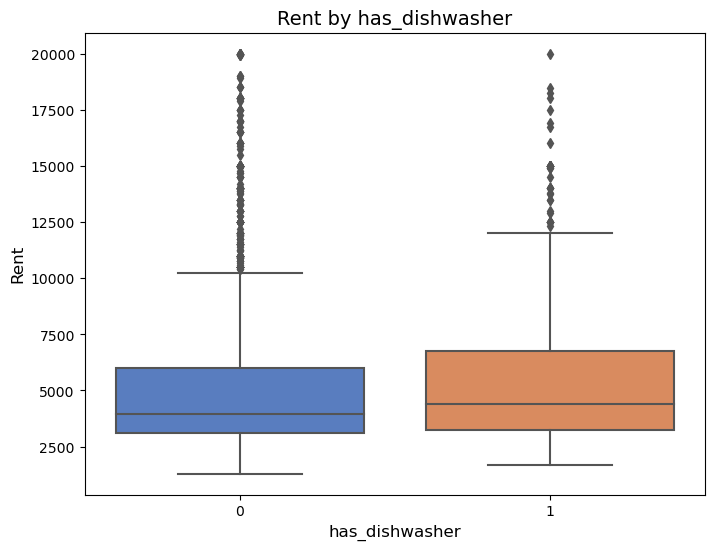

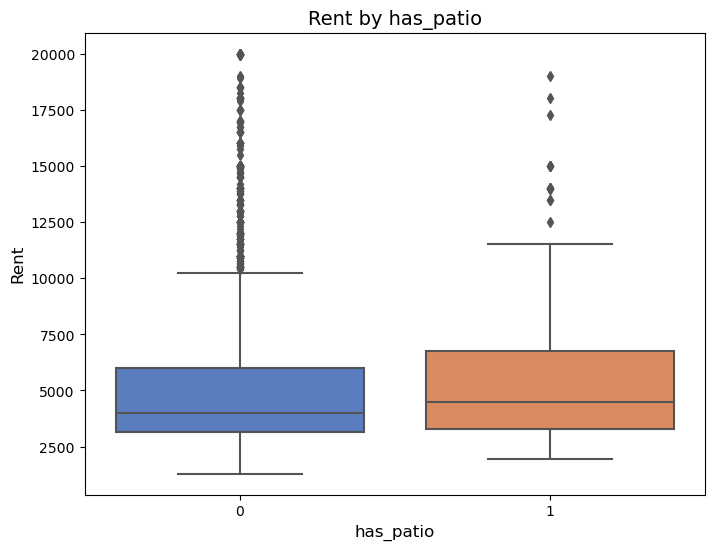

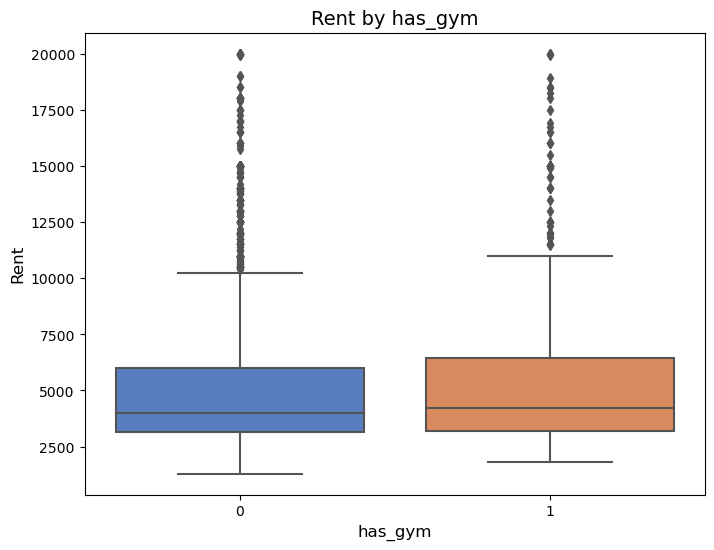

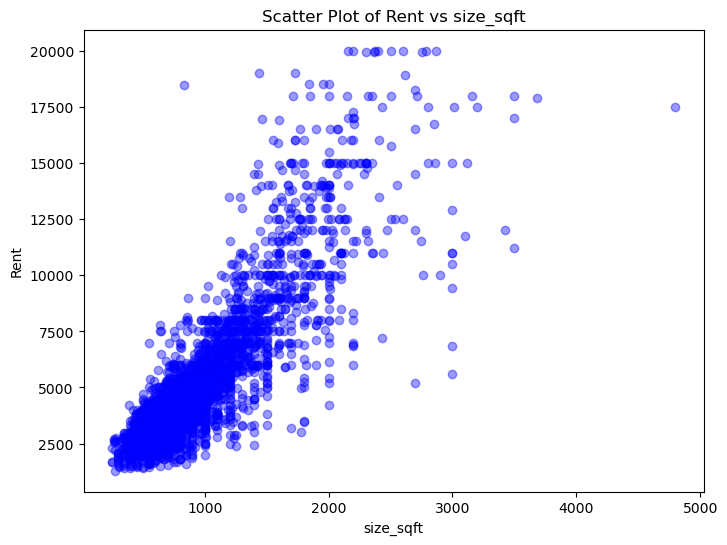

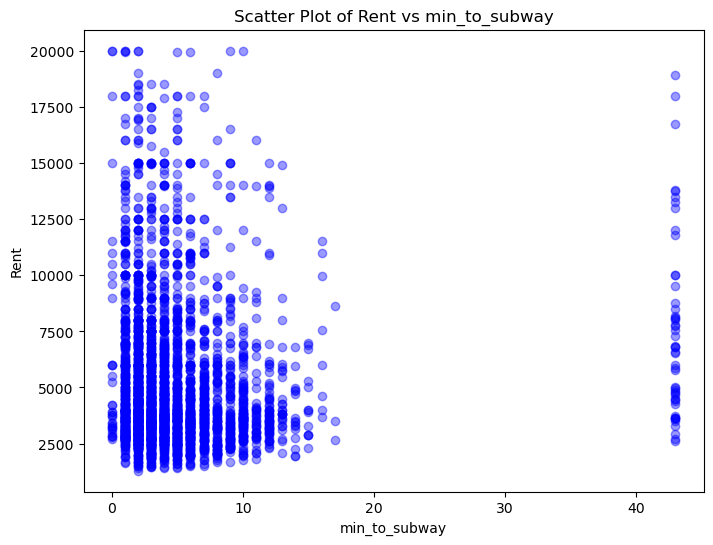

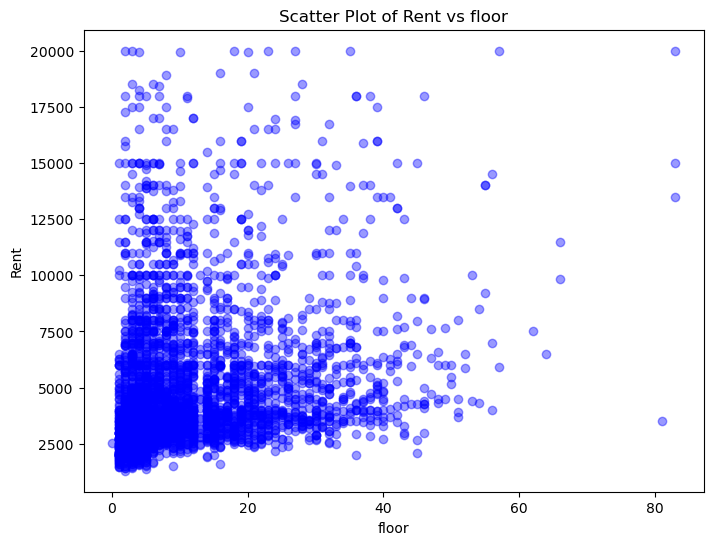

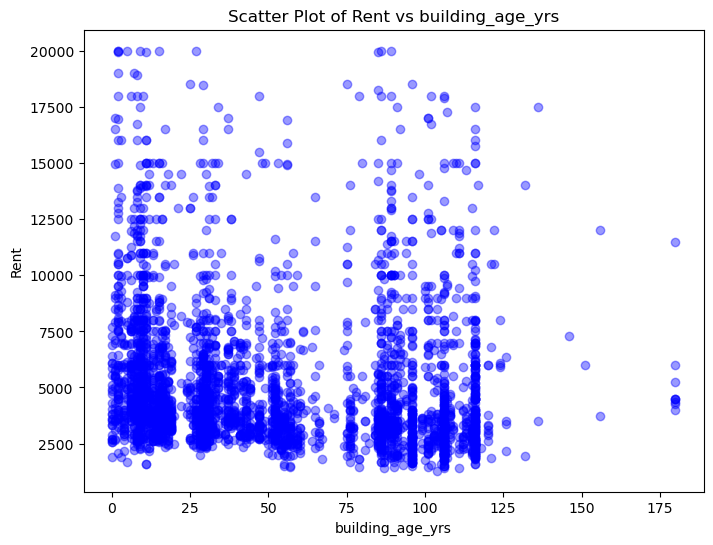

0.7725460559817883
0.8050371975357646


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from statannotations.Annotator import Annotator


# Load data
streeteasy = pd.read_csv("manhattan.csv")
df = pd.DataFrame(streeteasy)

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 
         'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 
         'has_washer_dryer', 'has_doorman', 'has_elevator', 
         'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

# Train the model
mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_predict = mlr.predict(x_test)
# takes values calculated by `.fit()` and the `x` values, plugs them into the multiple linear regression equation, and calculates the predicted y values. 

# Create a scatter plot
plt.scatter(y_test, y_predict, alpha=0.4)

# Create x-axis label and y-axis label
plt.xlabel("Actual rent")
plt.ylabel("Predicted rent")

# Create a title
plt.title("Rent estimations")

# Show the plot
plt.show()

# Threshold for detecting discrete features
discrete_threshold = 10

# Detect discrete features
discrete_features = [
    col for col in x.columns 
    if x[col].nunique() <= discrete_threshold
]
continuous_features = [col for col in x.columns if x[col].nunique() > discrete_threshold]

# Plot discrete features
for feature in discrete_features:
    plt.figure(figsize=(8, 6))
    
    # Create boxplot
    ax = sns.boxplot(x=df[feature], y=df['rent'], palette="muted")
    ax.set_title(f"Rent by {feature}", fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Rent", fontsize=12)

    plt.show()
        

for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['rent'], alpha=0.4, color='blue')
    plt.xlabel(feature)
    plt.ylabel("Rent")
    plt.title(f"Scatter Plot of Rent vs {feature}")
    plt.show()

r = mlr.score(x_train, y_train)
print (r)
a = mlr.score(x_test, y_test)
print (a)






